In [67]:
# !pip install pandas
# !pip install seaborn

In [68]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [69]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
path = "/content/drive/MyDrive/Virtual Experience/cognizant_sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [71]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [72]:
## These functions are provided by instructors of the program but I don't think I will use them.

# def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
#   _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

# def get_unique_values(data, column):
#   num_unique_values = len(data[column].unique())
#   value_counts = data[column].value_counts()
#   print(f"Column: {column} has {num_unique_values} unique values\n")
#   print(value_counts)

# def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
#   _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

# def correlation_plot(data: pd.DataFrame = None):
#   corr = df.corr()
#   corr.style.background_gradient(cmap='coolwarm')

In [73]:
## Check shape and how many unique values in each column
print('Data shape:')
print(df.shape)
print('NUMBER OF UNIQUE VALUES')
for i in list(df.columns):
  print(i + ': ' + str(len(df[i].unique())))

Data shape:
(7829, 9)
NUMBER OF UNIQUE VALUES
transaction_id: 7829
timestamp: 7738
product_id: 300
category: 22
customer_type: 5
unit_price: 64
quantity: 4
total: 256
payment_type: 4


In [74]:
## Check for null values

df.isna().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [75]:
# 2 x 2 grid
# columns A, B, C, D

columns = ['A', 'B', 'C', 'D']
ic = 0
for i in [0, 1]:
  for j in [0, 1]:
    print(str(i) + ', ' + str(j) + ', ' + columns[ic])
    ic+=1

0, 0, A
0, 1, B
1, 0, C
1, 1, D


In [76]:
df.dtypes

transaction_id     object
timestamp          object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object

In [79]:
## Change the data type of time stamp column to date time type

df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df.dtypes

transaction_id            object
timestamp         datetime64[ns]
product_id                object
category                  object
customer_type             object
unit_price               float64
quantity                   int64
total                    float64
payment_type              object
dtype: object

In [88]:
## Expand the time stamp to create hour, day and date columns

df['hour'] = df['timestamp'].dt.hour.astype(str)
df['day_of_week'] = df['timestamp'].dt.dayofweek.astype(str)
df['date'] = df['timestamp'].dt.date

df.dtypes

transaction_id            object
timestamp         datetime64[ns]
product_id                object
category                  object
customer_type             object
unit_price               float64
quantity                   int64
total                    float64
payment_type              object
hour                      object
day_of_week               object
date                      object
dtype: object

In [89]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,hour,day_of_week,date
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9,2,2022-03-02
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10,6,2022-03-06
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17,4,2022-03-04
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,17,2,2022-03-02
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,14,5,2022-03-05


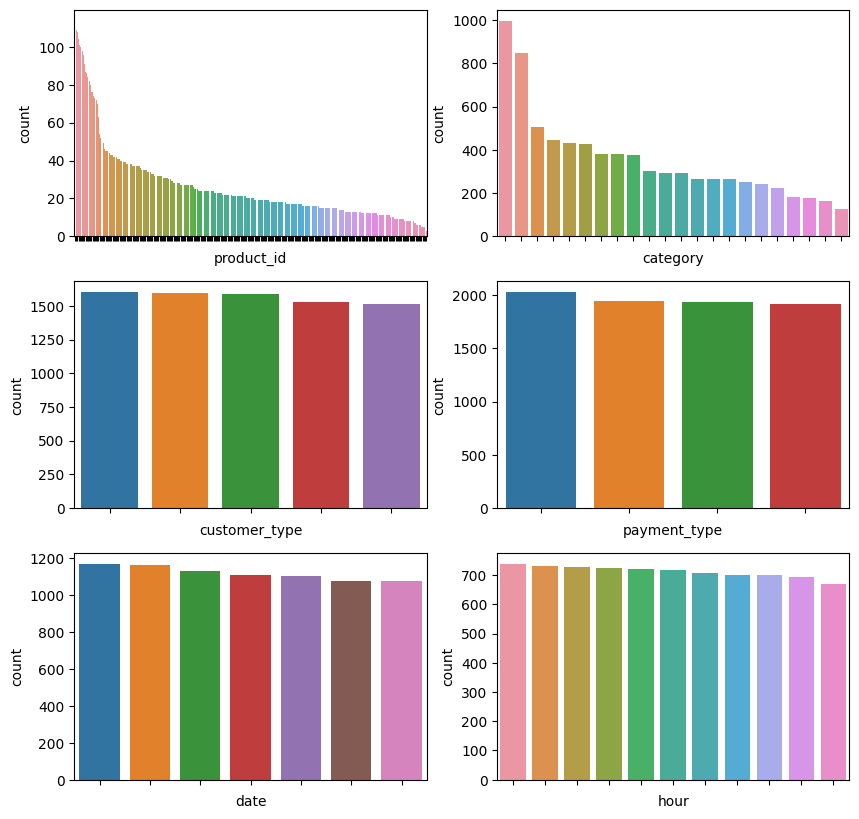

In [109]:
## Visualize data distribution of the categorical features

cats = ['product_id', 'category', 'customer_type', 'payment_type', 'date', 'hour']
idx = 0
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
# axes[-1, -1].axis('off')
for i in list(range(3)):
  for j in list(range(2)):
    if idx < 7: 
      ax = sns.countplot(ax=axes[i, j], data=df, x=cats[idx], order=df[cats[idx]].value_counts().index)
      ax.set(xticklabels=[])
      idx+=1

<Axes: xlabel='count', ylabel='date'>

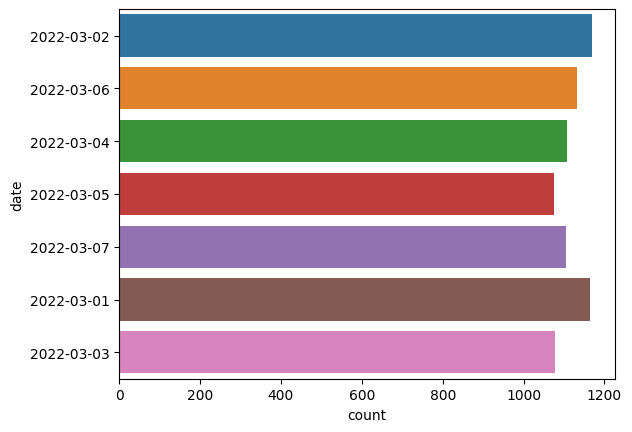

In [91]:
# sns.lineplot(data=new_df, x='Date', y='Value', hue='Category')
sns.countplot(data=df, y='date')

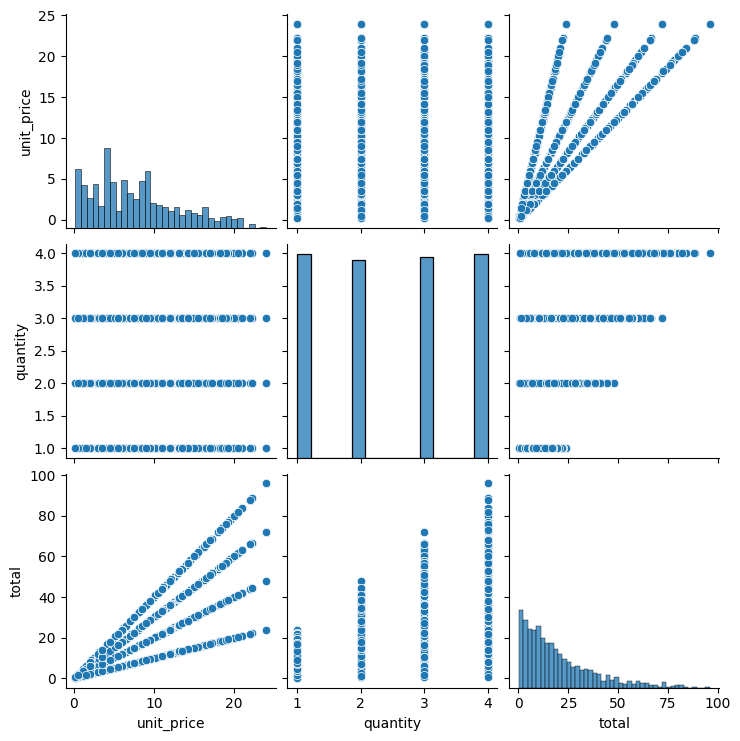

In [78]:
continuous = ['unit_price', 'quantity', 'total']
sns.pairplot(df[continuous])

I'm not going to create correlation heat map like in the walkthrough because it is kind of obvious that the total, unit price and quantity are connected to each other. Also, the hour variable is now categorical variable in my opinion.

COMMENT:

I don't think we can get reliable insight from only a week of data. We can find some trends there if we want, but it would not be wise to draw conclusions from there to be used as considerations for decision making.